<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_001_books/_007_sklearn/_000_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

np.unique(y)

array([0, 1, 2])

In [3]:
X.shape

(150, 2)

In [5]:
y.shape

(150,)

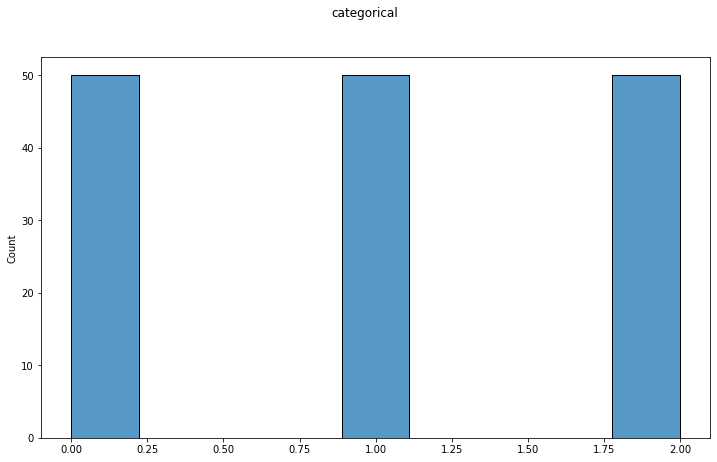

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

plt.suptitle('categorical')
sns.histplot(y)

X 는 2차원이고

원소 또한 배열이다.

In [14]:
X[:2]

array([[1.4, 0.2],
       [1.4, 0.2]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)

In [19]:
X_train.shape, y_train.shape

((105, 2), (105,))

In [22]:
print(f'y의 레이블 카운트: {np.bincount(y)}')
print(f'y_train의 레이블 카운트: {np.bincount(y_train)}')
print(f'y_test의 레이블 카운트: {np.bincount(y_test)}')

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [26]:
X_train_std.shape, X_test_std.shape

((105, 2), (45, 2))

In [27]:
X_train_std[:1]

array([[-1.33269725, -1.30728421]])

# 붓꽃 클래스를 퍼셉트론에 주입


In [28]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=.1, tol=1e-3, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
y_pred = ppn.predict(X_test_std)
print(f'잘못 분류된 샘플 개수: {(y_test != y_pred).sum()}')

잘못 분류된 샘플 개수: 28


In [34]:
from sklearn.metrics import accuracy_score
print(f'정확도: {accuracy_score(y_test, y_pred)}')

정확도: 0.37777777777777777
